# Proyek Analisis Data:  Bike Sharing Dataset
- **Nama:** Alfan Alfiansyah
- **Email:** alfanalfiansyah30@gmail.com
- **ID Dicoding:** fanzzy

## Menentukan Pertanyaan Bisnis

- How does the weather affect the number of bike rentals?
- Is there a difference in bike rental patterns between weekdays and weekends?

## Import Semua Packages/Library yang Digunakan

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import calendar

## Data Wrangling

### Gathering Data

In [38]:
hour_df = pd.read_csv('/content/Data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- This data shows the pattern of bicycle usage over a period of time.
- Weather conditions such as temperature, humidity, and wind speed may influence a person's decision to rent a bicycle.

### Assessing Data

In [39]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [40]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [41]:
print("Number of duplicates: ", hour_df.duplicated().sum())

Number of duplicates:  0


In [42]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [43]:
print(hour_df.shape)

(17379, 17)


### View unique values ​​in categorical columns



In [44]:
for col in ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']:
  print(f"Unique values in {col}: {hour_df[col].unique()}")

Unique values in season: [1 2 3 4]
Unique values in yr: [0 1]
Unique values in mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values in hr: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Unique values in holiday: [0 1]
Unique values in weekday: [6 0 1 2 3 4 5]
Unique values in workingday: [0 1]
Unique values in weathersit: [1 2 3 4]


### View data distribution in numeric columns

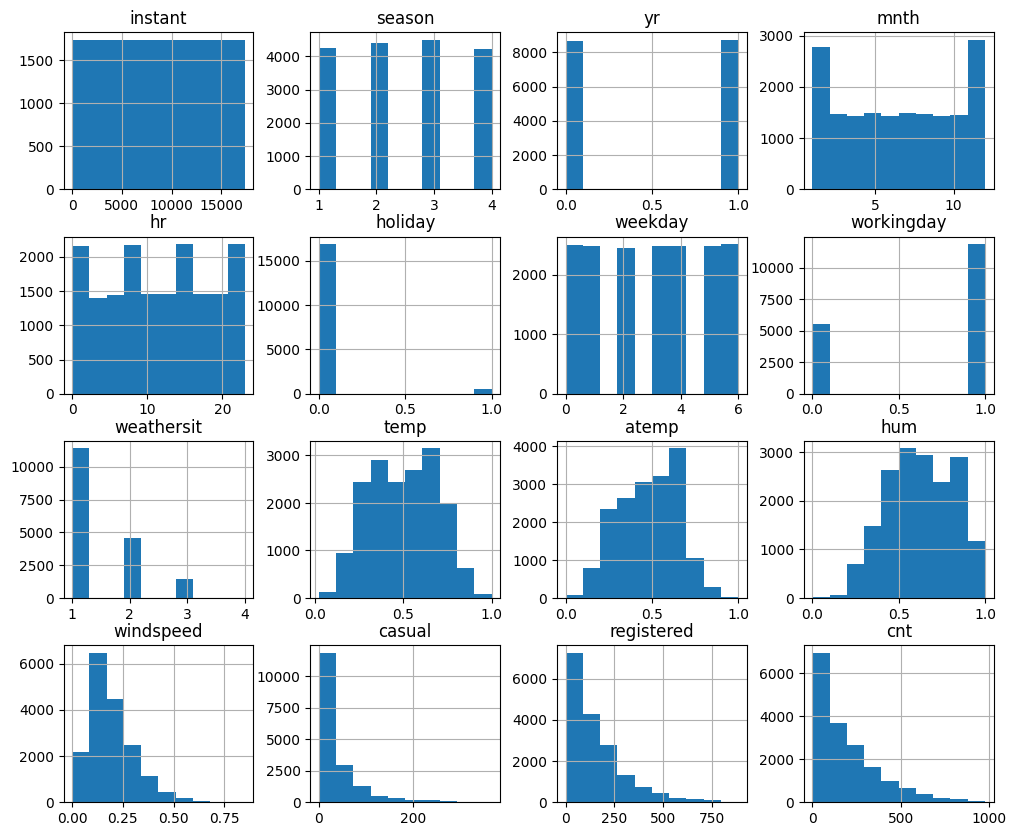

In [45]:
hour_df.hist(figsize=(12, 10))
plt.show()

**Insight:**
This figure provides an overview of the frequency distribution of various variables in the bike rental dataset. We can see that the number of bike rentals tends to be higher during certain times of the day (perhaps peak hours), certain seasons (perhaps summer), and on weekdays versus weekends. Additionally, weather variables such as temperature and humidity also appear to influence the number of rentals. Categorical variables such as day of the week and weather conditions show clear patterns in the distribution of the data. Overall, this histogram provides a good initial overview of bike rental patterns and can serve as a basis for further analysis.

### Cleaning Data

In [46]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [47]:
hour_df['weekday'] = hour_df['dteday'].dt.day_name()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [48]:
hour_df['mnth'] = hour_df['dteday'].dt.month_name()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [49]:
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in hour_df['season']:
    season = find_season(season)
    season_list.append(season)

hour_df['season'] = season_list

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,0,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,0,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [50]:
hour_df['yr'] = hour_df['dteday'].dt.year
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [51]:
hour_df['temp'] = hour_df['temp']*41
hour_df['atemp'] = hour_df['atemp']*50
hour_df['hum'] = hour_df['hum']*100
hour_df['windspeed'] = hour_df['windspeed']*67

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


In [29]:
hour_df.to_csv("dataset_clean.csv", index=False)

**Insight:**
The data displayed provides an overview of the variables that can be used for further analysis.

## Exploratory Data Analysis (EDA)

### Explore ...

In [52]:
hour_df.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,object
yr,int32
mnth,object
hr,int64
holiday,int64
weekday,object
workingday,int64
weathersit,int64


In [53]:
float_vars = ['temp', 'atemp', 'hum', 'windspeed']
hour_df_float = hour_df[float_vars]

hour_df_float.describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540
std,7.894801,8.592511,19.292983,8.196795
min,0.820000,0.000000,0.000000,0.000000
25%,13.940000,16.665000,48.000000,7.001500
50%,20.500000,24.240000,63.000000,12.998000
75%,27.060000,31.060000,78.000000,16.997900
max,41.000000,50.000000,100.000000,56.996900


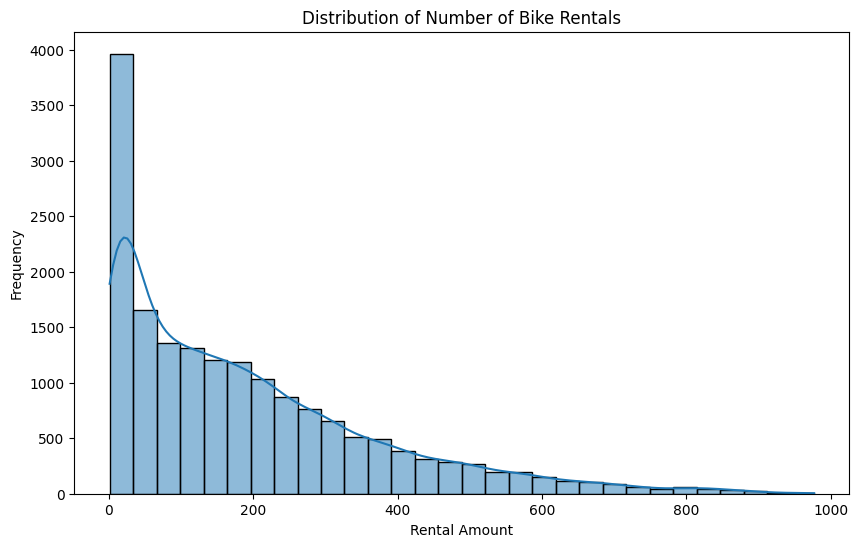

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(hour_df['cnt'], bins=30, kde=True)
plt.title('Distribution of Number of Bike Rentals')
plt.xlabel('Rental Amount')
plt.ylabel('Frequency')
plt.show()

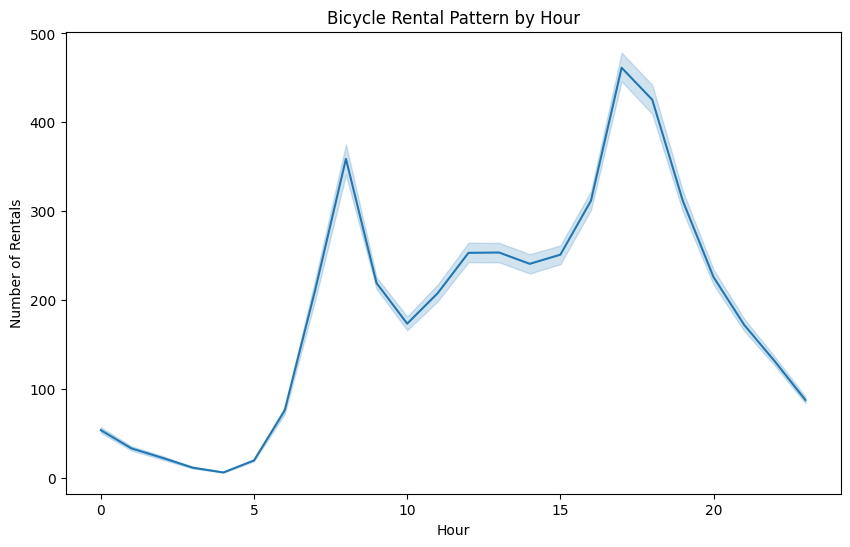

In [55]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=hour_df)
plt.title('Bicycle Rental Pattern by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Rentals')
plt.show()

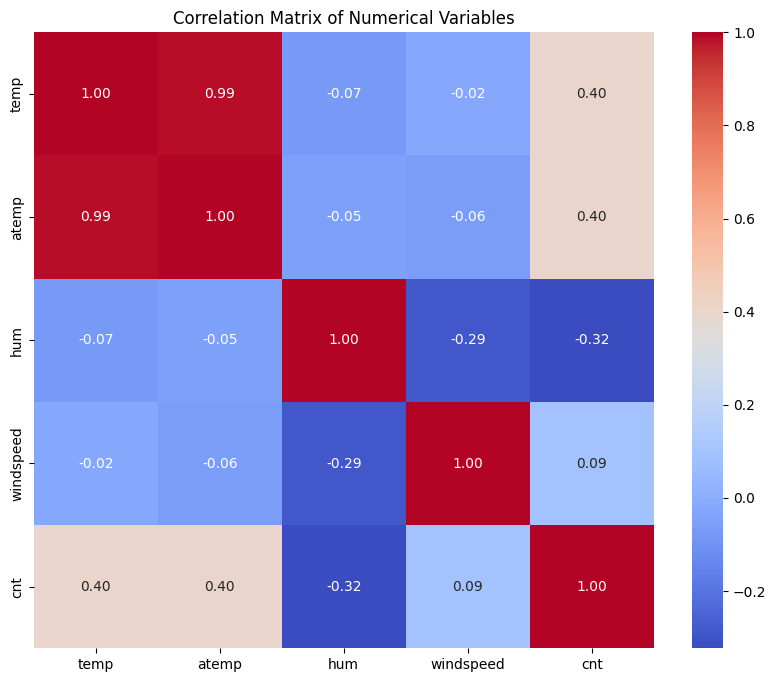

In [24]:
correlation_matrix = hour_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

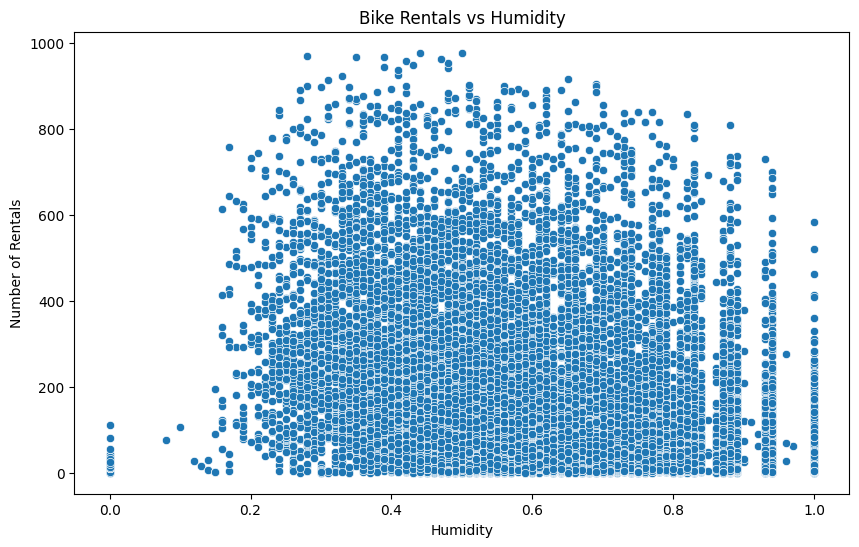

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=hour_df)
plt.title('Bike Rentals vs Humidity')
plt.xlabel('Humidity')
plt.ylabel('Number of Rentals')
plt.show()

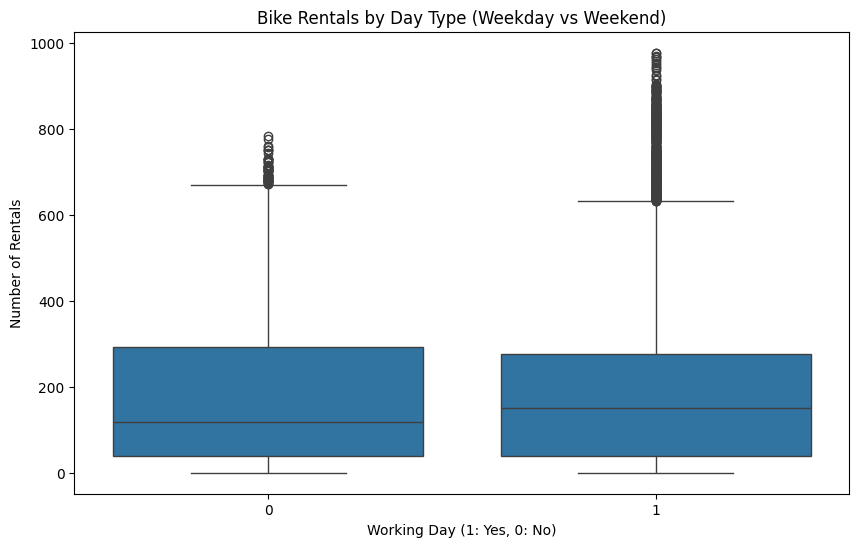

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=hour_df)
plt.title('Bike Rentals by Day Type (Weekday vs Weekend)')
plt.xlabel('Working Day (1: Yes, 0: No)')
plt.ylabel('Number of Rentals')
plt.show()

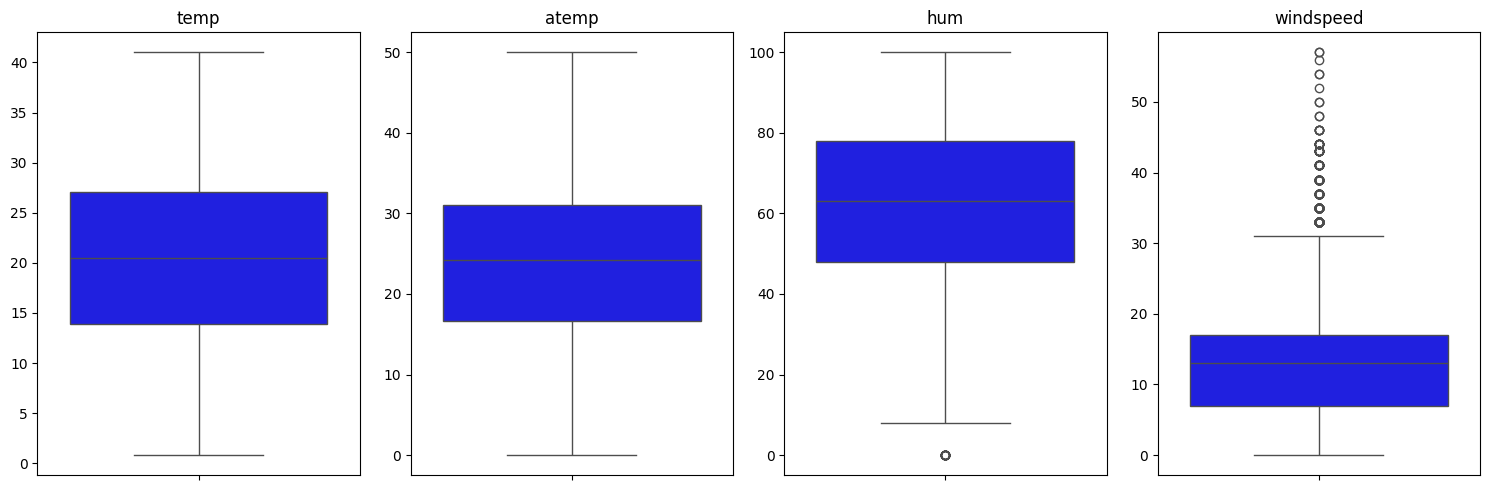

In [56]:
# Create a figure and 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Iterate over the float variables and create a boxplot for each one
for i, ax in enumerate(axs):
    sns.boxplot(y=hour_df_float[float_vars[i]], orient='v', ax=ax, color='blue')

    # Set the title and labels
    ax.set_title(float_vars[i])
    ax.set_ylabel("")

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-61-12336a44b2b8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-61-12336a44b2b8>:4: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


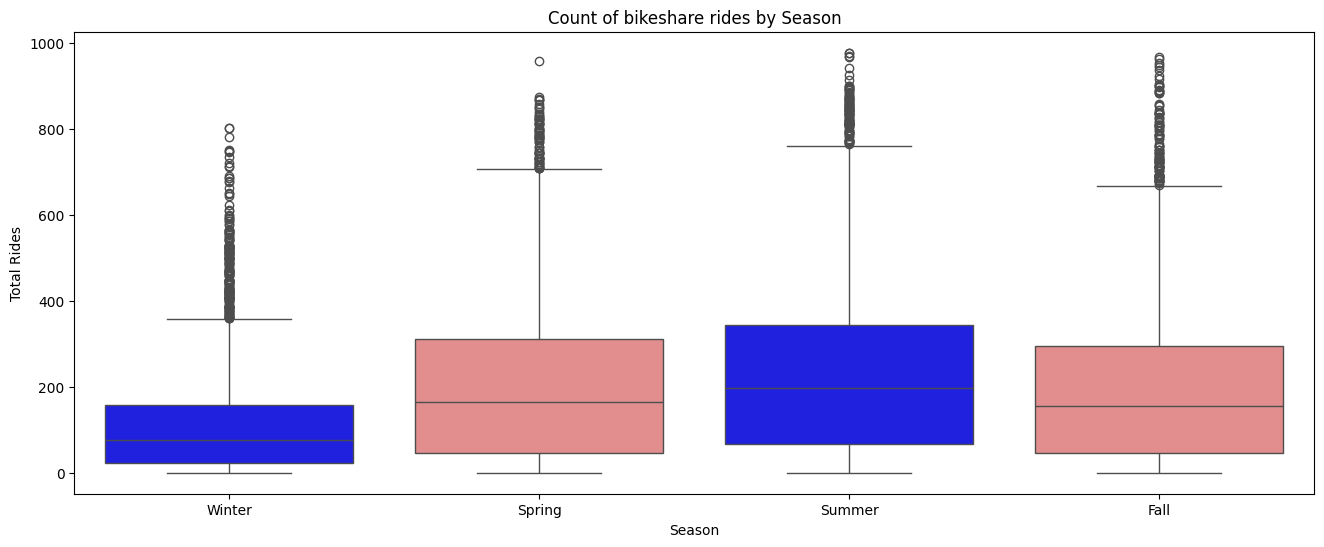

In [61]:
plt.figure(figsize=(16,6)) #Fixed typo here

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="season",
    y="cnt",
    data=hour_df,
    palette=["blue", "lightcoral"]
)

# Add labels and a title to the plot
plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

# Show the plot
plt.show()

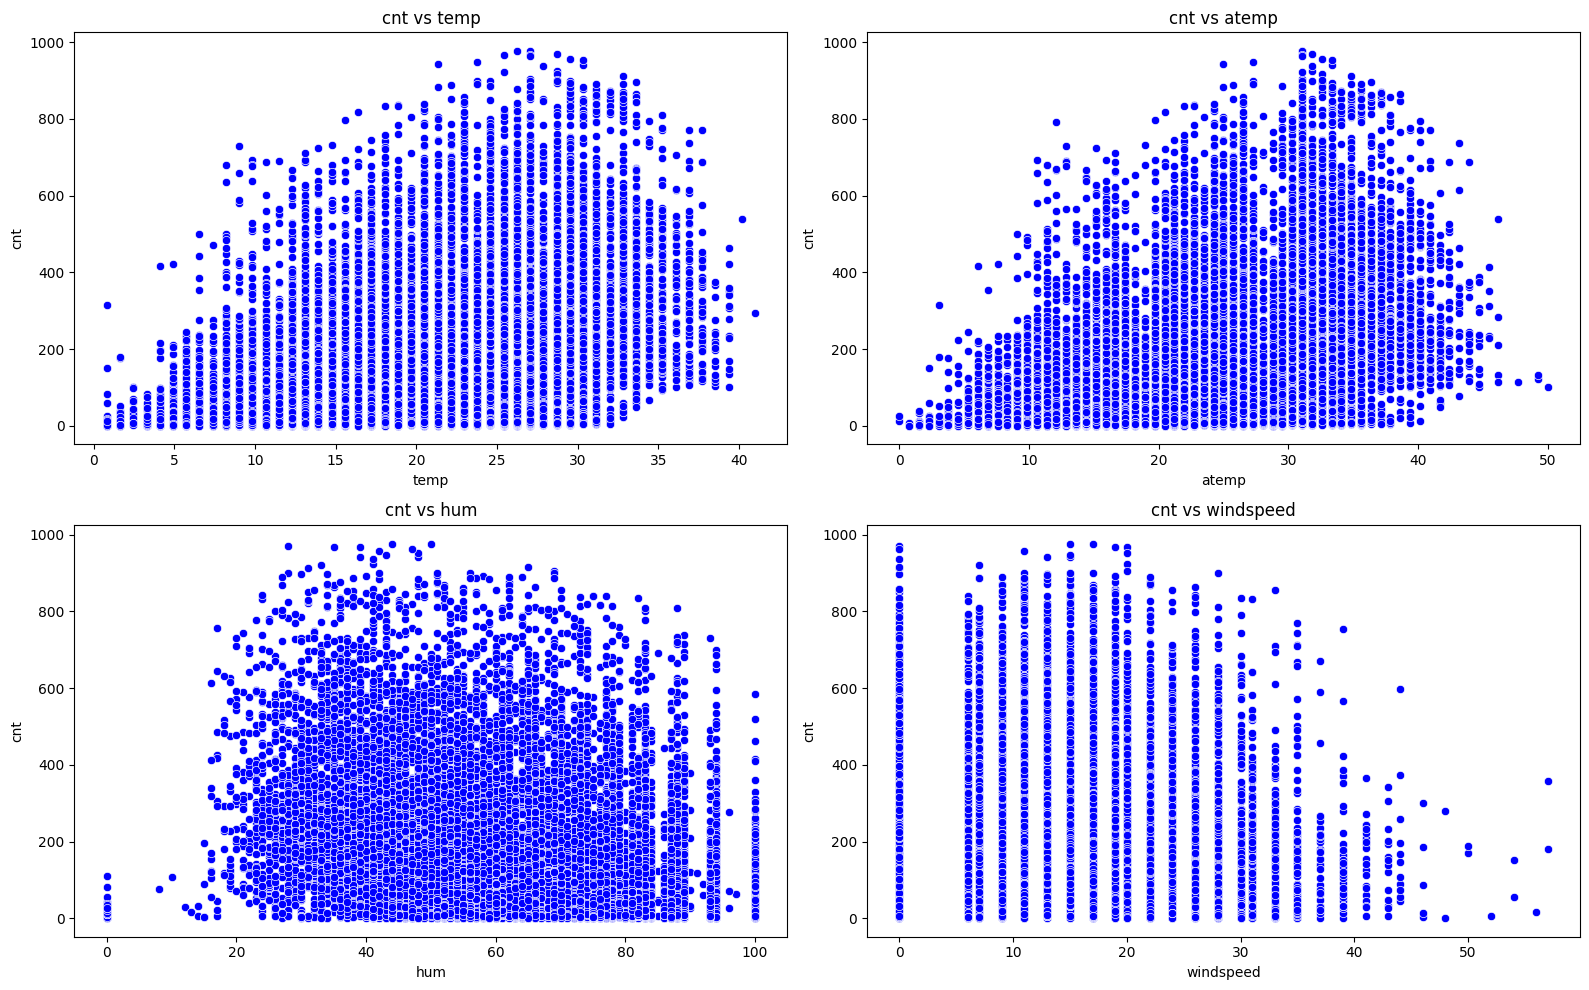

In [62]:
# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Iterate over the other variables and create a scatterplot for each one
for i, col in enumerate(hour_df.columns[10:14]):
    sns.scatterplot(x=col, y='cnt', data=hour_df, ax=axs[i // 2, i % 2], color='blue')
    axs[i // 2, i % 2].set_title(f'cnt vs {col}')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

<Axes: >

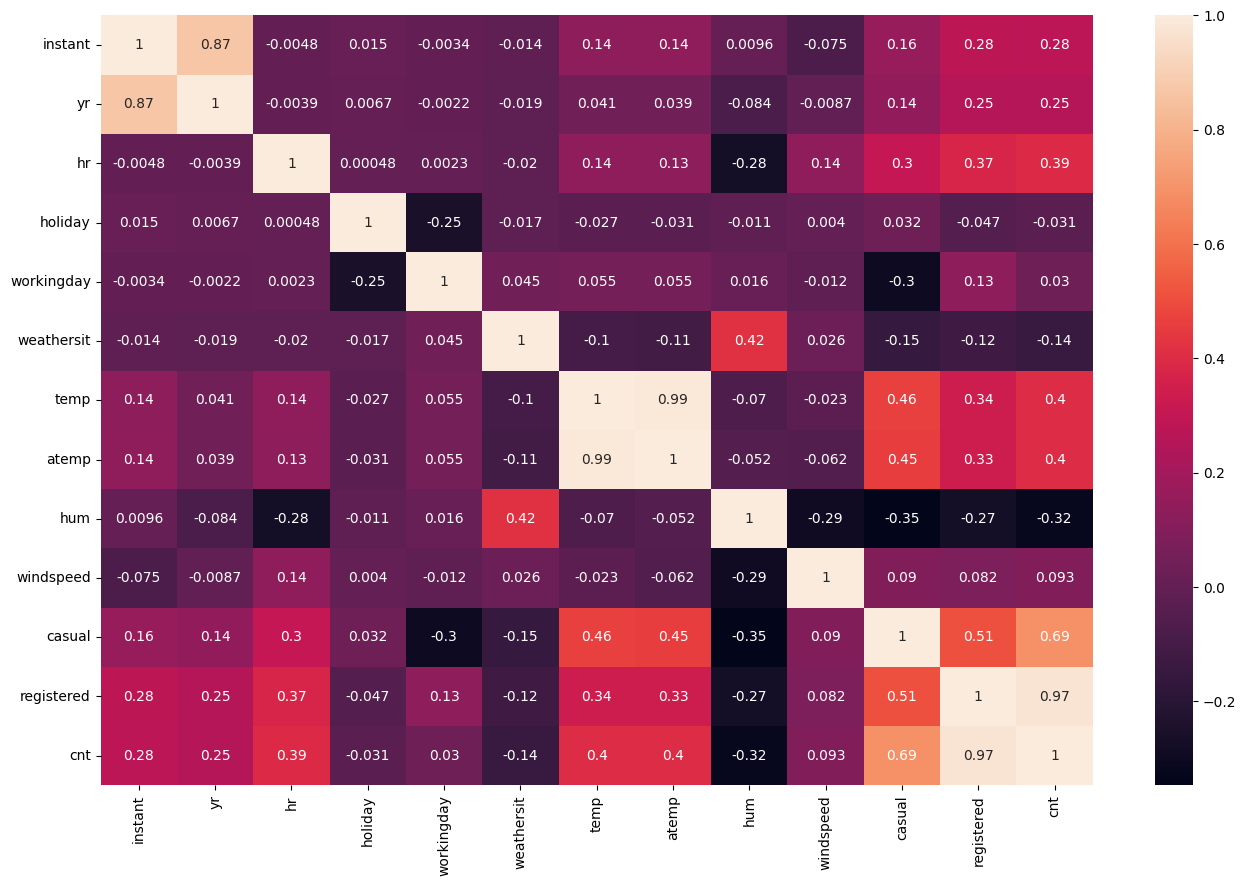

In [63]:
plt.figure(figsize=(16, 10))
# Remove columns with non-numeric data before calculating correlation
sns.heatmap(hour_df.select_dtypes(include=np.number).corr(), annot=True)

**Insight:**
The figure shows the correlation matrix between the different variables in the bike rental dataset. A strong correlation is seen between ‘temp’ (temperature) and ‘atemp’ (perceived temperature), which makes sense. Additionally, ‘casual’ (casual users) and ‘registered’ (registered users) are positively correlated with ‘cnt’ (total rentals), indicating that both types of users contribute to the increase in rentals. Interestingly, ‘workingday’ has a weak negative correlation with ‘cnt’, indicating that rentals may be slightly lower on weekdays compared to holidays or weekends.

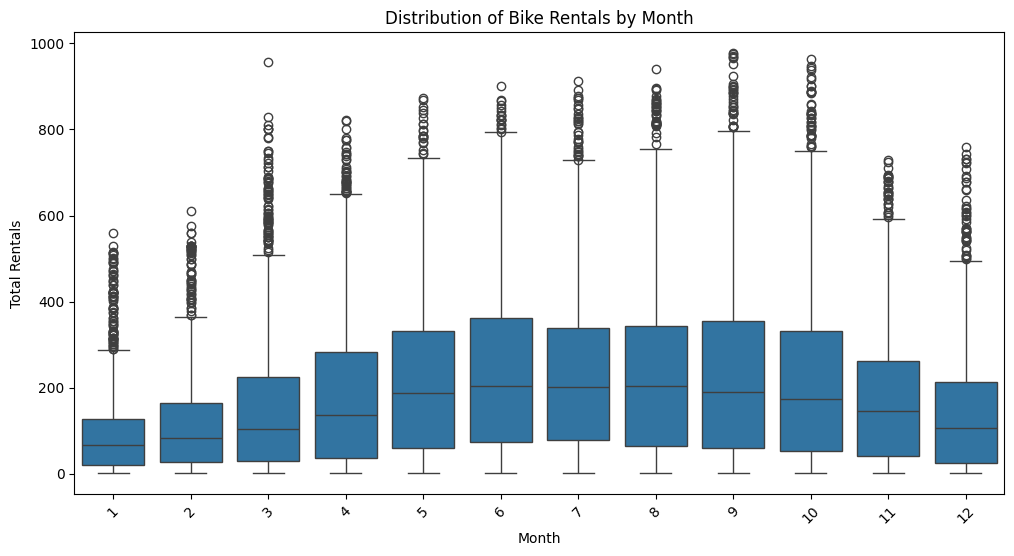

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='mnth', y='cnt', data=hour_df)
plt.title('Distribution of Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.show()

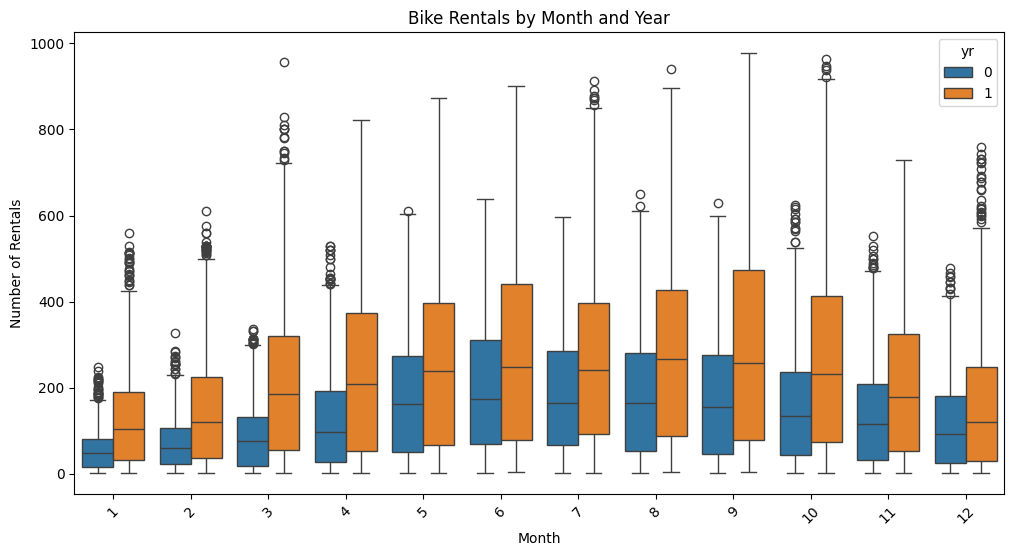

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='mnth', y='cnt', hue='yr', data=hour_df)
plt.title('Bike Rentals by Month and Year')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=45)
plt.show()

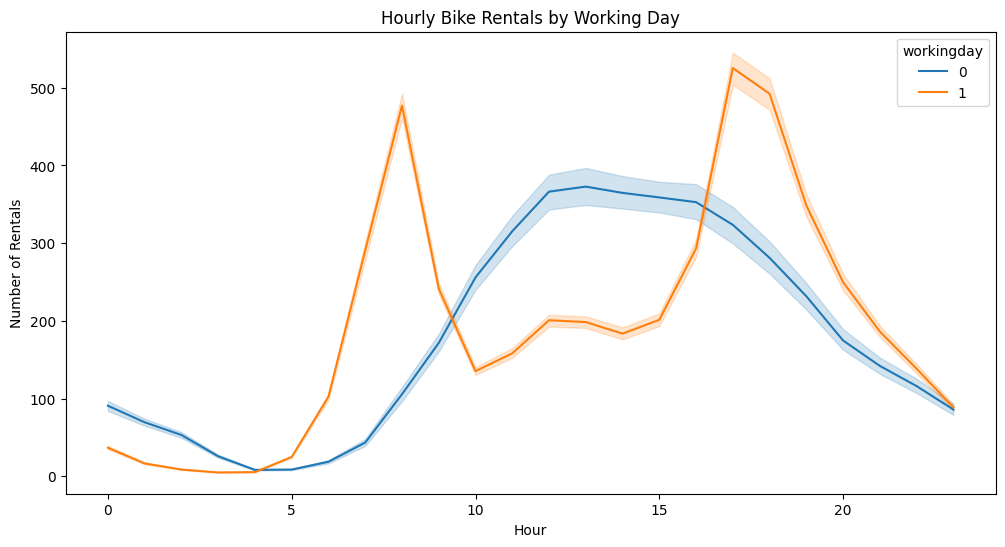

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='workingday', data=hour_df)
plt.title('Hourly Bike Rentals by Working Day')
plt.xlabel('Hour')
plt.ylabel('Number of Rentals')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: How does the weather affect the number of bike rentals?

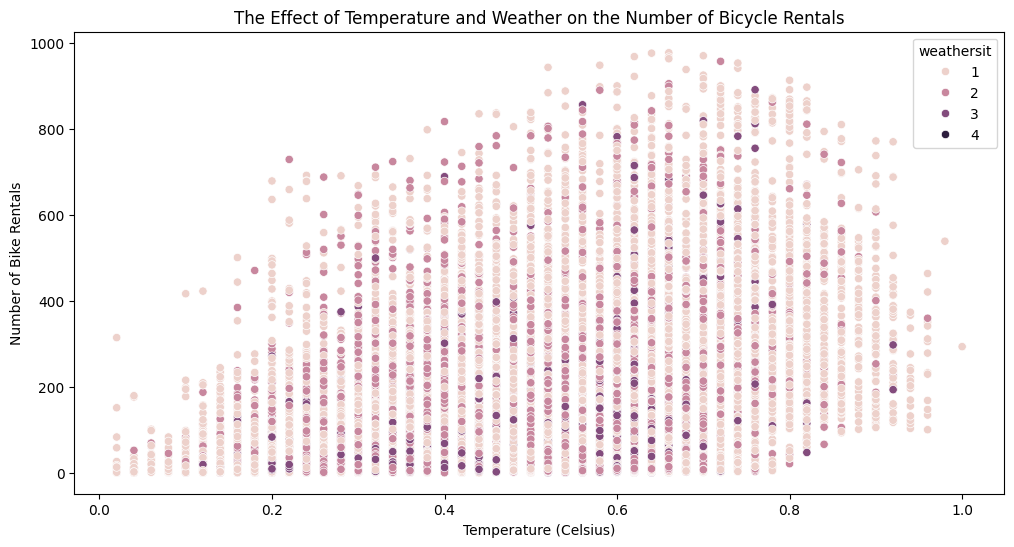

               temp       hum  windspeed       cnt
temp       1.000000 -0.069881  -0.023125  0.404772
hum       -0.069881  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.290105   1.000000  0.093234
cnt        0.404772 -0.322911   0.093234  1.000000


In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='cnt', hue='weathersit', data=hour_df)
plt.title('The Effect of Temperature and Weather on the Number of Bicycle Rentals')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Number of Bike Rentals')
plt.show()

# Analisis Korelasi
correlation = hour_df[['temp', 'hum', 'windspeed', 'cnt']].corr()
print(correlation)

# Based on the visualization and correlation analysis, it can be concluded that:
* Temperature has a positive effect on the number of bicycle rentals. The higher the temperature, the number of rentals tends to increase.
* Weather also affects the number of bicycle rentals. When the weather is bad (weathersit 3 and 4), the number of rentals tends to decrease.
* Humidity and wind speed may have a slight negative effect on the number of rentals, but the effect is not very significant.





### Pertanyaan 2: Is there a difference in bike rental patterns between weekdays and weekends?

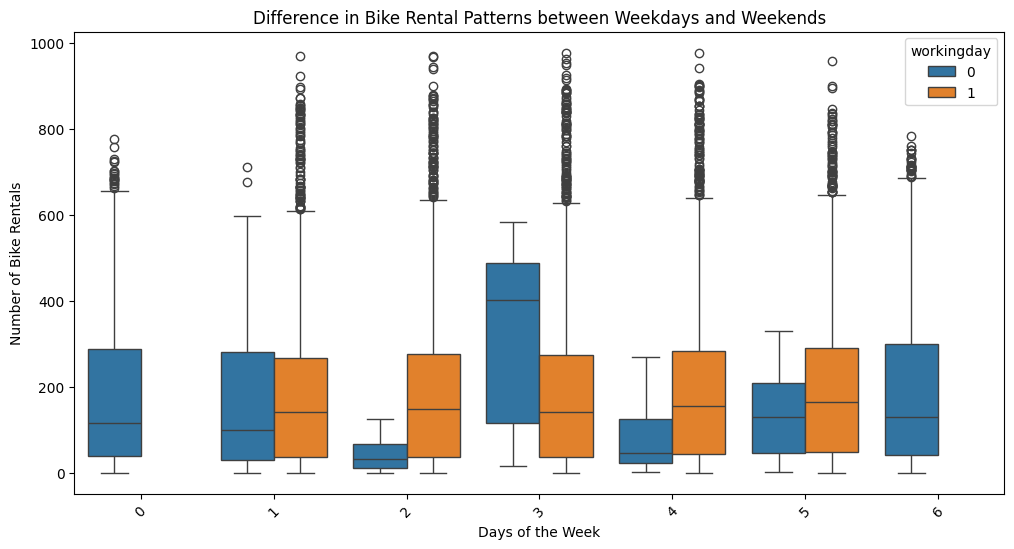

Average bike rental on weekdays: 193.21
Average bike rental on weekends: 181.41


In [35]:
import matplotlib.pyplot as plt
# Visualization of bicycle rental patterns between weekdays and weekends
plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='cnt', data=hour_df, hue='workingday')
plt.title('Difference in Bike Rental Patterns between Weekdays and Weekends')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Bike Rentals')
plt.xticks(rotation=45)
plt.show()

# Analysis of the average number of bicycle rentals on weekdays and weekends
average_working_days_rental = hour_df[hour_df['workingday'] == 1]['cnt'].mean()
average_weekend_rental = hour_df[hour_df['workingday'] == 0]['cnt'].mean()

print(f"Average bike rental on weekdays: {average_working_days_rental:.2f}")
print(f"Average bike rental on weekends: {average_weekend_rental:.2f}")

**Insight:**
*  There are differences in bicycle rental patterns between weekdays and weekends.
* In general, the number of bicycle rentals is higher on weekdays compared to weekends.
* This shows that most bicycle users use bicycles for commuting or daily activities.






## Conclusion

- Poor weather conditions, such as rain or snow, significantly decrease bike rentals. This is likely due to safety concerns and discomfort associated with cycling in adverse weather.

- Bike rentals tend to be higher on weekdays, suggesting that a substantial portion of users utilize bikes for commuting purposes or daily errands